In [1]:
from IPython.display import Image
Image('churn.png')

# 1. Data Preprocessing and Exploration

## 1.1. Importing Librairies and Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [4]:
dataset.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [5]:
dataset.shape

(10000, 14)

In [6]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## 1.2 Statical Description

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
dataset.describe(include='all')

RowNumber    CustomerId Surname   CreditScore Geography Gender  \
count   10000.00000  1.000000e+04   10000  10000.000000     10000  10000   
unique          NaN           NaN    2932           NaN         3      2   
top             NaN           NaN   Smith           NaN    France   Male   
freq            NaN           NaN      32           NaN      5014   5457   
mean     5000.50000  1.569094e+07     NaN    650.528800       NaN    NaN   
std      2886.89568  7.193619e+04     NaN     96.653299       NaN    NaN   
min         1.00000  1.556570e+07     NaN    350.000000       NaN    NaN   
25%      2500.75000  1.562853e+07     NaN    584.000000       NaN    NaN   
50%      5000.50000  1.569074e+07     NaN    652.000000       NaN    NaN   
75%      7500.25000  1.575323e+07     NaN    718.000000       NaN    NaN   
max     10000.00000  1.581569e+07     NaN    850.000000       NaN    NaN   

                 Age        Tenure        Balance  NumOfProducts    HasCrCard  \
count   10000.000000  10000.000000   10000.000000   10000.000000  10000.00000   
unique           NaN           NaN            NaN            NaN          NaN   
top              NaN           NaN            NaN            NaN          NaN   
freq             NaN           NaN            NaN            NaN          NaN   
mean       38.921800      5.012800   76485.889288       1.530200      0.70550   
std        10.487806      2.892174   62397.405202       0.581654      0.45584   
min        18.000000      0.000000       0.000000       1.000000      0.00000   
25%        32.000000      3.000000       0.000000       1.000000      0.00000   
50%        37.000000      5.000000   97198.540000       1.000000      1.00000   
75%        44.000000      7.000000  127644.240000       2.000000      1.00000   
max        92.000000     10.000000  250898.090000       4.000000      1.00000   

        IsActiveMember  EstimatedSalary        Exited  
count     10000.000000     10000.000000  10000.000000  
unique             NaN              NaN           NaN  
top                NaN              NaN           NaN  
freq               NaN              NaN           NaN  
mean          0.515100    100090.239881      0.203700  
std           0.499797     57510.492818      0.402769  
min           0.000000        11.580000      0.000000  
25%           0.000000     51002.110000      0.000000  
50%           1.000000    100193.915000      0.000000  
75%           1.000000    149388.247500      0.000000  
max           1.000000    199992.480000      1.000000

In [9]:
dataset.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [10]:
dataset.describe(include='object')

Surname Geography Gender
count    10000     10000  10000
unique    2932         3      2
top      Smith    France   Male
freq        32      5014   5457

In [11]:
dataset['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [12]:
dataset['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

# 1.3 Boxplot

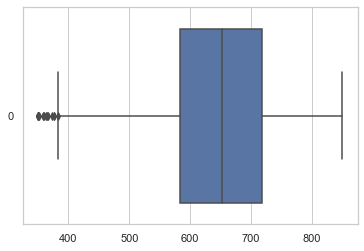

In [13]:
sns.set(style = 'whitegrid')
ax = sns.boxplot(data=dataset['CreditScore'], orient='h')

In [14]:
IQR = dataset['CreditScore'].quantile(0.75)-dataset['CreditScore'].quantile(0.25)

In [15]:
IQR

134.0

In [16]:
Inf = dataset['CreditScore'].quantile(0.25)-1.5*IQR

In [17]:
Inf

383.0

In [18]:
dataset[dataset['CreditScore']<Inf].count()

RowNumber          15
CustomerId         15
Surname            15
CreditScore        15
Geography          15
Gender             15
Age                15
Tenure             15
Balance            15
NumOfProducts      15
HasCrCard          15
IsActiveMember     15
EstimatedSalary    15
Exited             15
dtype: int64

In [19]:
Sup = dataset['CreditScore'].quantile(0.75)+1.5*IQR

In [20]:
Sup

919.0

In [21]:
dataset[dataset['CreditScore']<Sup].count()

RowNumber          10000
CustomerId         10000
Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

In [22]:
my_list = ['CreditScore','Age']
my_list

['CreditScore', 'Age']

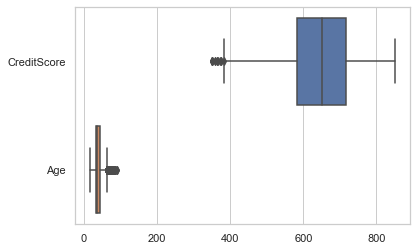

In [23]:
sns.set(style = 'whitegrid')
ax = sns.boxplot(data=dataset[my_list], orient='h')

# 1.4 Seaborn

Text(0, 0.5, 'CreditScore')

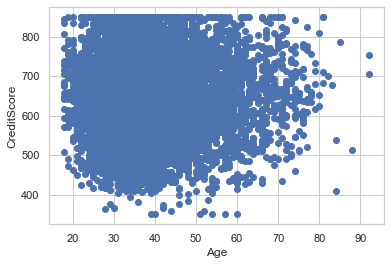

In [24]:
plt.scatter(x=dataset['Age'], y=dataset['CreditScore'])
plt.xlabel('Age')
plt.ylabel('CreditScore')

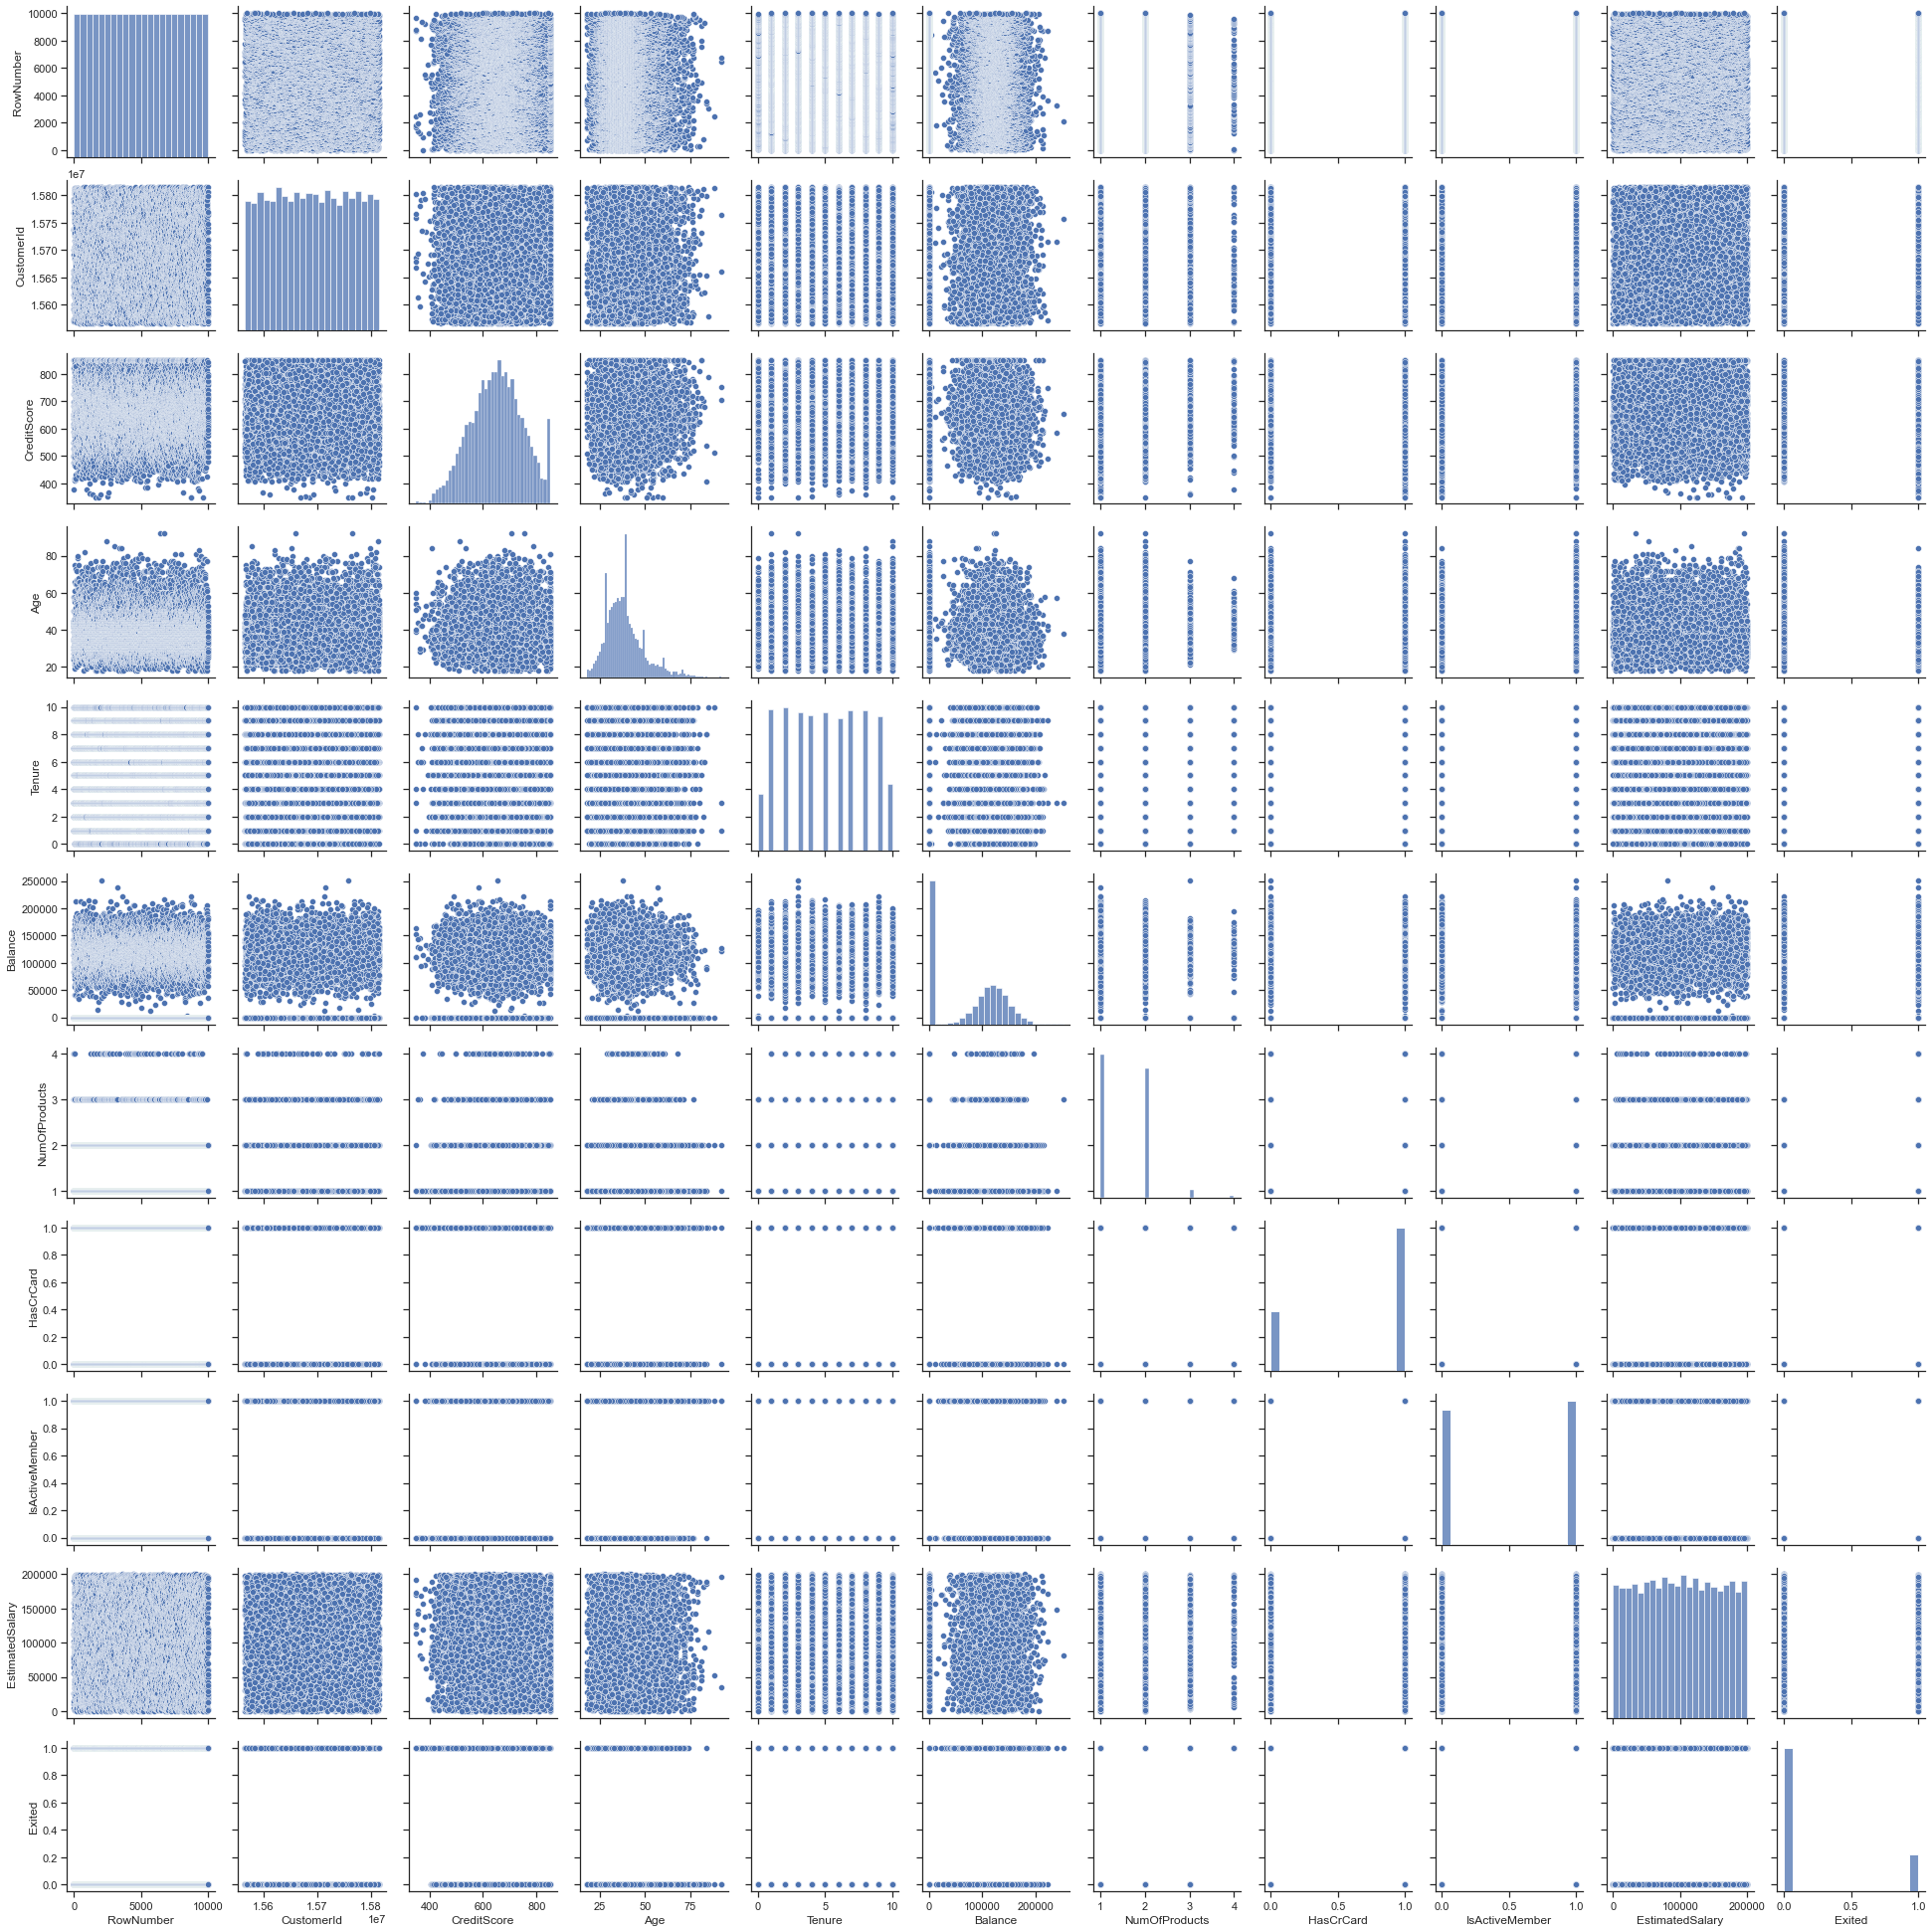

In [25]:
sns.set(style='ticks')
sns.pairplot(dataset)

# Input Variables and Target

In [26]:
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [27]:
X.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  
0          1               1        101348.88  
1          0               1        112542.58  
2          1               0        113931.57  
3          0               0         93826.63  
4          1               1         79084.10

In [28]:
type(X)

pandas.core.frame.DataFrame

In [82]:
print(y)

[1 0 1 ... 1 1 0]


**Convert DataFrame to Numpy array**

In [29]:
X = X.values
y = y.values

In [30]:
X[0:5,:]

array([[619, 'France', 'Female', 42, 2, 0.0, 1, 1, 1, 101348.88],
       [608, 'Spain', 'Female', 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [502, 'France', 'Female', 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [699, 'France', 'Female', 39, 1, 0.0, 2, 0, 0, 93826.63],
       [850, 'Spain', 'Female', 43, 2, 125510.82, 1, 1, 1, 79084.1]],
      dtype=object)

# 1.6 Encoding Categorical Data

In [31]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [32]:
X[:,1]= label.fit_transform(X[:,1])
X[:,2]= label.fit_transform(X[:,2])

In [33]:
X[:,:]

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

**Dummy Encoding**

In [34]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer

In [35]:
ct = ColumnTransformer([('Geography',OneHotEncoder(),[1])],remainder = 'passthrough')

In [36]:
X = ct.fit_transform(X)

In [37]:
X[0:10,:]

array([[1.0, 0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
       [0.0, 0.0, 1.0, 608, 0, 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [1.0, 0.0, 0.0, 502, 0, 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [1.0, 0.0, 0.0, 699, 0, 39, 1, 0.0, 2, 0, 0, 93826.63],
       [0.0, 0.0, 1.0, 850, 0, 43, 2, 125510.82, 1, 1, 1, 79084.1],
       [0.0, 0.0, 1.0, 645, 1, 44, 8, 113755.78, 2, 1, 0, 149756.71],
       [1.0, 0.0, 0.0, 822, 1, 50, 7, 0.0, 2, 1, 1, 10062.8],
       [0.0, 1.0, 0.0, 376, 0, 29, 4, 115046.74, 4, 1, 0, 119346.88],
       [1.0, 0.0, 0.0, 501, 1, 44, 4, 142051.07, 2, 0, 1, 74940.5],
       [1.0, 0.0, 0.0, 684, 1, 27, 2, 134603.88, 1, 1, 1, 71725.73]],
      dtype=object)

In [38]:
X=X[:,1:]

In [39]:
X[0:2,:]

array([[0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
       [0.0, 1.0, 608, 0, 41, 1, 83807.86, 1, 0, 1, 112542.58]],
      dtype=object)

In [40]:
X.shape

(10000, 11)

In [41]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [42]:
features = [ 'Geography2','Geography3','CreditScore',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']

In [43]:
features

['Geography2',
 'Geography3',
 'CreditScore',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

# 1.7 Splitting Dataset into Train and Test sets

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

In [45]:
X_train.shape

(8000, 11)

In [46]:
X_test.shape

(2000, 11)

In [47]:
y_test.mean()

0.2025

In [48]:
y_train.mean()

0.204

# 1.8 Feature Scaling -> Mise en échelle

In [49]:
#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [50]:
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.fit_transform(X_test)

In [51]:
X_test_sc

array([[ 1.62776996, -0.57427105, -0.56129438, ...,  0.66011376,
         0.97628121,  1.62185911],
       [-0.61433742, -0.57427105, -1.33847768, ...,  0.66011376,
        -1.02429504,  0.504204  ],
       [-0.61433742,  1.74133801,  0.58347561, ...,  0.66011376,
         0.97628121, -0.41865644],
       ...,
       [-0.61433742,  1.74133801, -0.76084144, ...,  0.66011376,
        -1.02429504,  0.72775202],
       [ 1.62776996, -0.57427105, -0.0046631 , ...,  0.66011376,
         0.97628121, -1.54162886],
       [ 1.62776996, -0.57427105, -0.81335383, ...,  0.66011376,
        -1.02429504,  1.62356528]])

In [52]:
X_train[0,:]

array([0.0, 1.0, 667, 0, 34, 5, 0.0, 2, 1, 0, 163830.64], dtype=object)

In [53]:
X_train_sc[0,:]

array([-0.5698444 ,  1.74309049,  0.16958176, -1.09168714, -0.46460796,
        0.00666099, -1.21571749,  0.8095029 ,  0.64259497, -1.03227043,
        1.10643166])

In [54]:
(667 - X_train[:,2].mean())/(X_train[:,2].std())

0.16958176236487257

In [55]:
#(667 - X_train[:,2].min())/(X_train[:,2].max()-X_train[:,2].min()) MinMaxScaler

# 2. K Nearest Neightbors

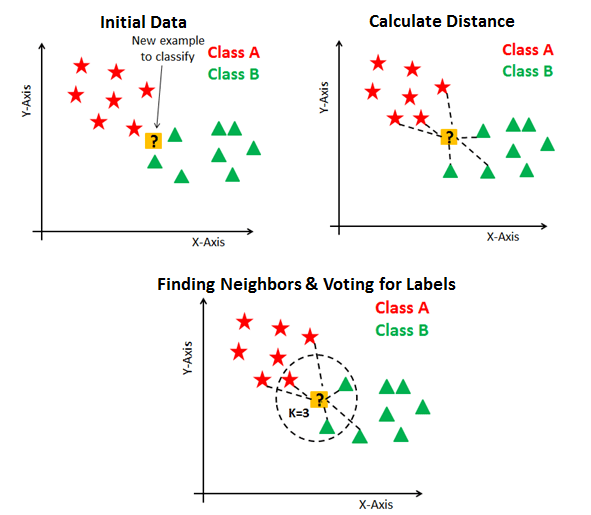

In [56]:
Image('knn.png')

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [58]:
knn.fit(X_train_sc, y_train)

KNeighborsClassifier()

In [59]:
y_pred_knn = knn.predict(X_test_sc)

In [60]:
# Showing the 10 occurence of comparaison
for i in range(10):
    print(y_test[i],y_pred_knn[i])

0 0
1 0
0 0
0 0
0 0
1 1
0 0
0 0
1 0
1 1


In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [62]:
print('Confusion matrix knn \n',confusion_matrix(y_test,y_pred_knn))
print('Accuracy knn \n',accuracy_score(y_test,y_pred_knn))

Confusion matrix knn 
 [[1497   98]
 [ 237  168]]
Accuracy knn 
 0.8325


In [63]:
#Image('metrics.png')

In [64]:
from sklearn.metrics import recall_score, precision_score

In [65]:
print('Precision \n',precision_score(y_test,y_pred_knn))
print('Recall \n',recall_score(y_test,y_pred_knn))

Precision 
 0.631578947368421
Recall 
 0.4148148148148148


In [66]:
from sklearn.metrics import classification_report

In [67]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1595
           1       0.63      0.41      0.50       405

    accuracy                           0.83      2000
   macro avg       0.75      0.68      0.70      2000
weighted avg       0.82      0.83      0.82      2000



**Great Search**

In [68]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors': [1,3,5,7,9,11,13]}
model = KNeighborsClassifier()
clf = GridSearchCV(model,parameters,scoring='accuracy', cv=5)
grille = clf.fit(X_train_sc,y_train)
print(grille.best_params_)
print(grille.best_score_)

{'n_neighbors': 9}
0.8303750000000001


In [69]:
y_predictKNN_O = grille.predict(X_test_sc)
print("Accuracy optimized KNN {0:.3f}".format(accuracy_score(y_test,y_predictKNN_O)))
print("Precision optimized KNN {0:.3f}".format(precision_score(y_test,y_predictKNN_O)))
print('Recall optimized KNN {0:.3f}'.format(recall_score(y_test,y_predictKNN_O)))

Accuracy optimized KNN 0.837
Precision optimized KNN 0.680
Recall optimized KNN 0.368


In [70]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [71]:
dt.fit(X_train_sc, y_train)

DecisionTreeClassifier()

In [72]:
y_pred_dt = dt.predict(X_test)

In [73]:
# Showing the 10 occurence of comparaison
for i in range(10):
    print(y_test[i],y_pred_dt[i])

0 0
1 0
0 0
0 0
0 0
1 0
0 0
0 0
1 0
1 0


In [74]:
y_predictDT_O = grille.predict(X_test_sc)
print("Accuracy optimized DT {0:.3f}".format(accuracy_score(y_test,y_predictDT_O)))
print("Precision optimized DT {0:.3f}".format(precision_score(y_test,y_predictDT_O)))
print('Recall optimized DT {0:.3f}'.format(recall_score(y_test,y_predictDT_O)))

Accuracy optimized DT 0.837
Precision optimized DT 0.680
Recall optimized DT 0.368


In [75]:
!pip install graphviz

In [76]:
import graphviz
from sklearn import tree
from sklearn.tree import export_graphviz
model = DecisionTreeClassifier(max_depth=5)
model.fit(X,y)

DecisionTreeClassifier(max_depth=5)

In [77]:
X.shape

(10000, 11)

In [78]:
features

['Geography2',
 'Geography3',
 'CreditScore',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [79]:
tree.export_graphviz(model,feature_names=features,out_file='dt_cdoss.dot',label='all',filled=True, rounded=True)

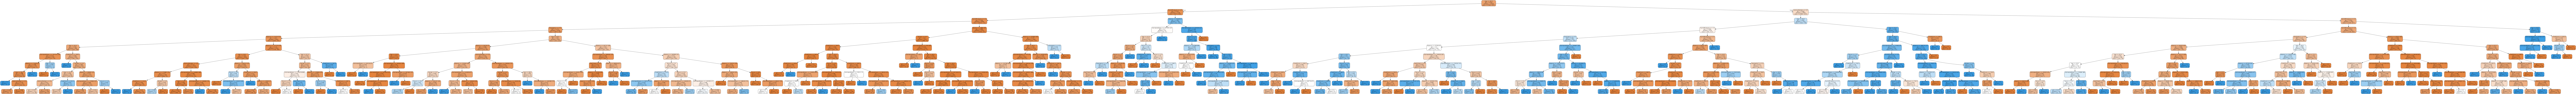

In [80]:
Image('decision_graph.png')

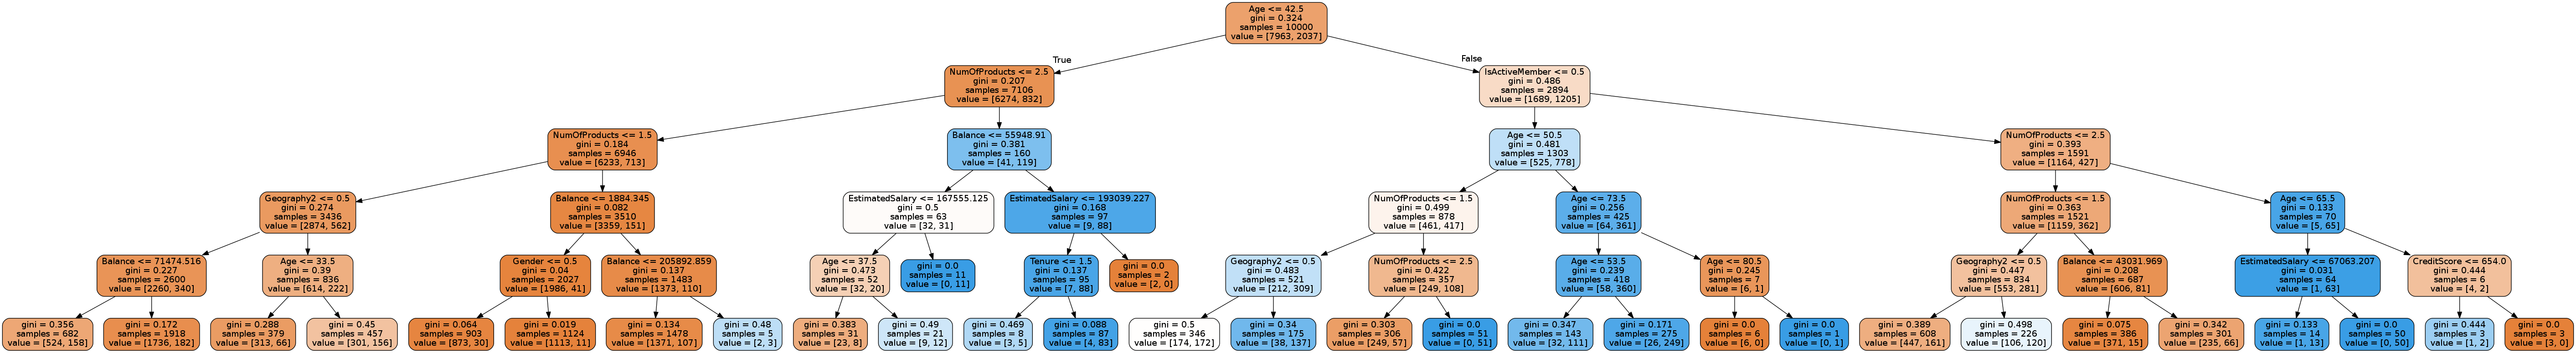

In [81]:
Image('dt_cdoss.png')